# Setting up document

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
from sklearn import datasets

# PCA

Principal Component Analysis is an unsupervised algorithm that calculates the maximum variances among all the data, in an n-dimensional space, along multiple axis. Essentially, this means we can take any multi-dimensional space and reduce it to only the axis (principal components) that represent the largest distributions.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
z = iris.feature_names

irisDF = pd.DataFrame(data=x, columns=z)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
scaler = StandardScaler()
scaler.fit(x)
irisScaled = scaler.transform(x)

In [5]:
pcaIris = PCA(n_components=3)
pcaIrisTrans = pcaIris.fit(irisScaled).transform(irisScaled)

In [6]:
explainedVariance = pcaIris.explained_variance_ratio_ * 100
print('Percentage of variance explained by each principal component:', explainedVariance)

Percentage of variance explained by each principal component: [72.96244541 22.85076179  3.66892189]


Text(0.5, 1.0, 'Distribution of variance across principal components')

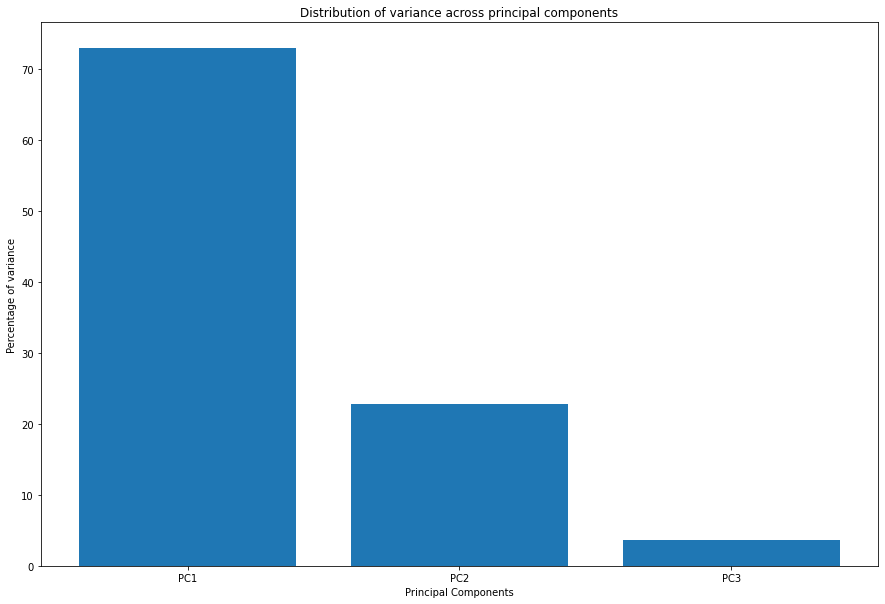

In [7]:
names = ['PC1', 'PC2', 'PC3']
plt.figure(figsize = (15, 10))
plt.bar(names, explainedVariance)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')
plt.title('Distribution of Variance Across Principal Components')

As mentioned above, the PCs are representations of the variance in the data. The overwhelming amount of variance will be within the first PC, quickly tapering off and usually reducing to nearly insignificant values by the ~4th PC.

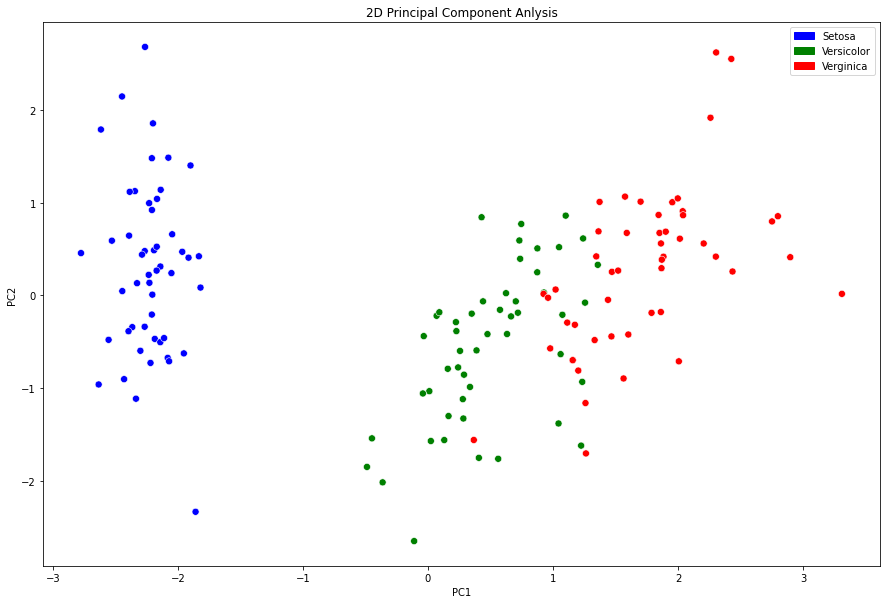

In [8]:
setosa = mpatches.Patch(color='blue', label='Setosa')
versicolor = mpatches.Patch(color='green', label='Versicolor')
virginica = mpatches.Patch(color='red', label='Verginica')

plt.figure(figsize = (15, 10))
sns.scatterplot(x=pcaIrisTrans[:,0], y=pcaIrisTrans[:,1], s=50, hue=y, palette=['blue','green','red'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Principal Component Anlysis')
plt.legend(handles=[setosa, versicolor, virginica])

This plot shows the variance represented by the first two PCs. As you cna see, there is a decent amount of overlap between the versicolor and verginica points, so projecting this onto a singular axis (PC1) would not accurately display the division between the two, the way it does with setosa. This would be especially difficult if we did not have the classes to color code our points.

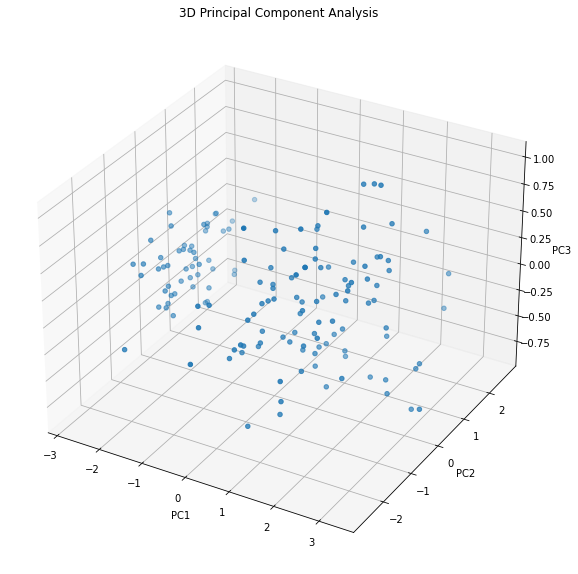

In [9]:
pca3D = plt.figure(figsize = (15, 10))
pca3DAx = plt.axes(projection = "3d")

pca3DAx.set_xlabel('PC1')
pca3DAx.set_ylabel('PC2')
pca3DAx.set_zlabel('PC3')
plt.title('3D Principal Component Analysis')

pca3DAx.scatter3D(xs = pcaIrisTrans[:,0], ys = pcaIrisTrans[:,1], zs = pcaIrisTrans[:,2], depthshade = True)

This is a scatter plot of all three PCs. This time, they're not color coded, to show the difficulty in determining a distinction between points. We can see there's a small cluster (setosa) to the left side of the plot, but versicolor and verginica are completely indistriguishable from each other, without their class labels. 

# LDA

Unlike PCA, linear discriminant analysis is a supervised algorithm, meaning it takes the classes of each entry into account, while finding variance. For instance, with this Iris dataset, we can maximize the variance among the three classes, instead of the data as a whole.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
ldaIris = LinearDiscriminantAnalysis(n_components=2)
ldaIrisTrans = ldaIris.fit(irisScaled, y).transform(irisScaled)

In [12]:
ldaIris.explained_variance_ratio_

array([0.9912126, 0.0087874])

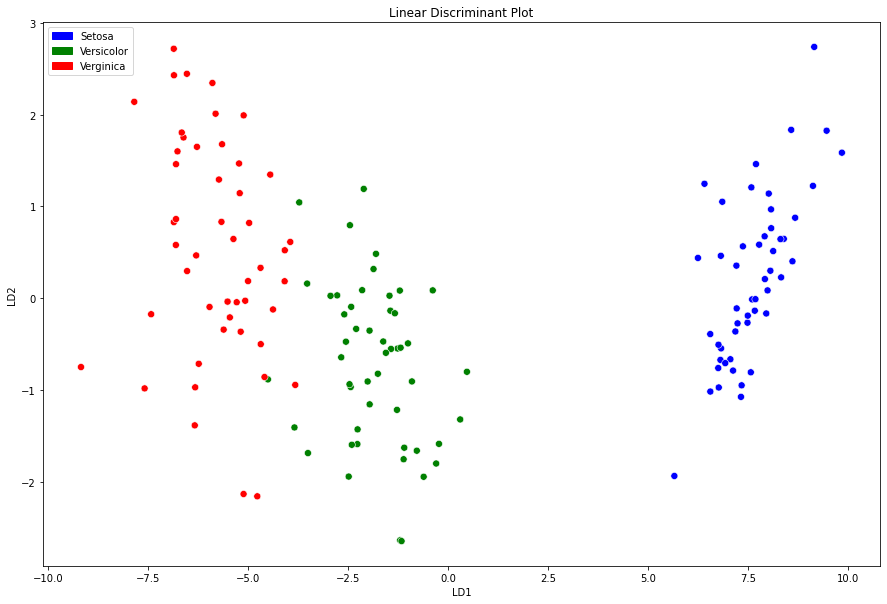

In [13]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x=ldaIrisTrans[:,0], y=ldaIrisTrans[:,1], s=50, hue=y, palette=['blue','green','red'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear Discriminant Plot')
plt.legend(handles=[setosa, versicolor, virginica])

As we see in the LDA plot above, there is a clearer distinction between varsicolor and verginica that was present before. This is thanks to LDA being a supervised algorithm and its ability to take an n-dimensional set of data, the class labels, and calculate axis that maximize the variance among the data sets.